In [208]:
# Import av dependencies
%matplotlib inline

# Python imports
import math, time, random, datetime

# Data manipulation
import numpy as np
import pandas as pd

# Visualisering
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Ignorera varningar (för nu)
import warnings
warnings.filterwarnings('ignore')

# Import av träningsdata
train = pd.read_csv('data/weatherAUS.csv')

# Överblick av träningsdatan
train.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


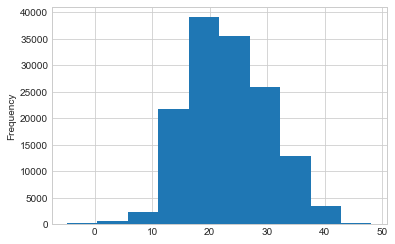

In [209]:
train.MaxTemp.plot.hist()

In [210]:
# Metadata över NUMERISK data weatherAUS.csv
train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [211]:
# Metadata över KATEGORISK data weatherAUS.csv
train.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2016-07-19,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


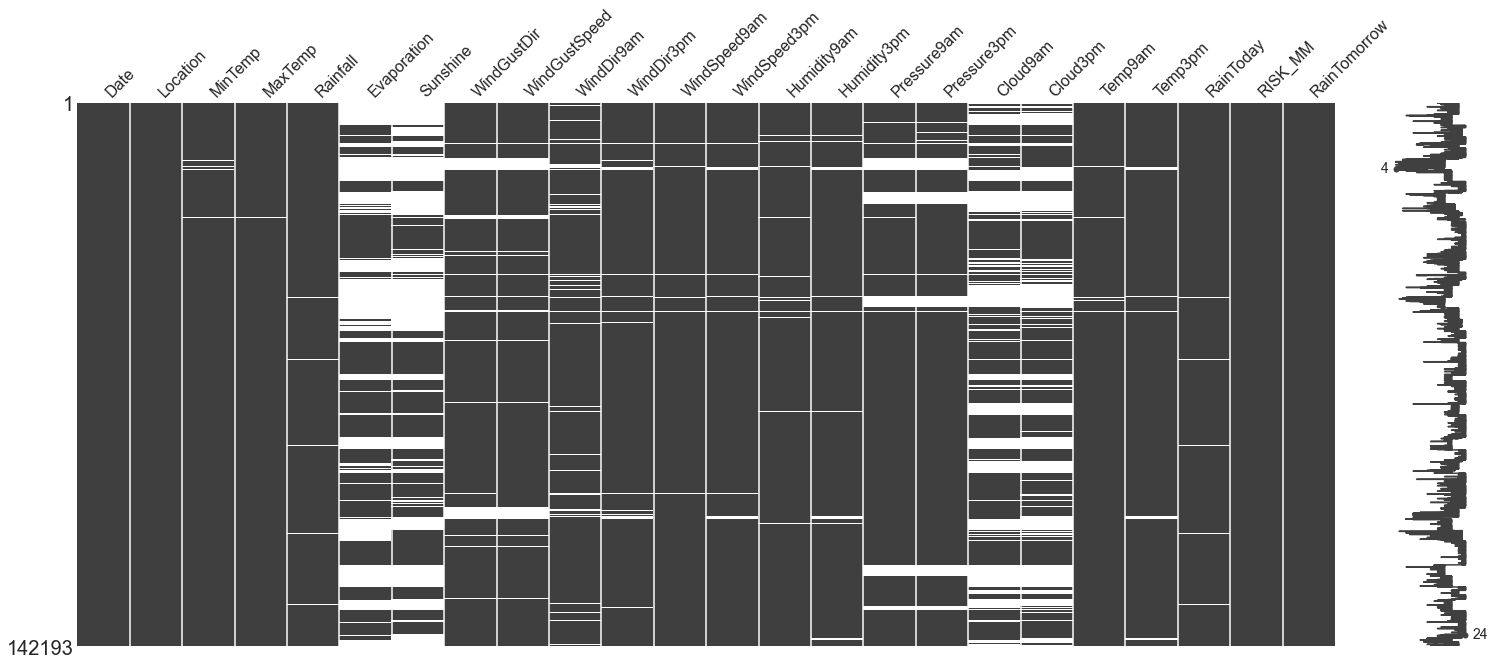

In [212]:
# Ta fram saknade värden i datan
missingno.matrix(train)

In [213]:
# Ta fram saknade värden i datan, alt 2
train.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [214]:
# numerical = pd.DataFrame() # för numeriska variabler(Temperatur, Vindhastighet osv)
# categorical = pd.DataFrame() # för kategoriska variabler(Ja/Nej, Väderstreck osv)


df_bin = pd.DataFrame() # för discretised continous variables
df_con = pd.DataFrame() # för continous variables

In [215]:
# Går igenom kolumnerna och tar fram alla numeriska variabler och lägger i en list
# numerical = [var for var in train.columns if train[var].dtype!='O']
# print('There are {} numerical variables\n'.format(len(numerical)))
# print('The numerical variables are :', numerical)

In [216]:
# Går igenom kolumnerna och tar fram alla kategoriska variabler och lägger i en list
# categorical = [var for var in train.columns if train[var].dtype=='O']
# print('There are {} categorical variables\n'.format(len(categorical)))
# print('The numerical variables are :', categorical)

In [217]:
# Ta fram de olika datatyperna
train.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


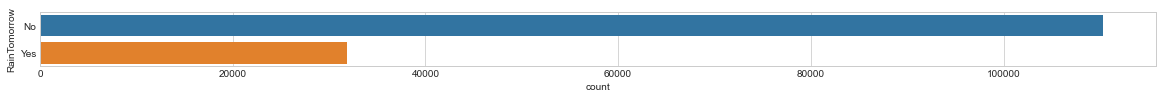

In [218]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='RainTomorrow', data=train);
print(train.RainTomorrow.value_counts())

In [219]:
# Lägger till i subset dataframes
df_bin['RainTomorrow'] = train['RainTomorrow']
df_con['RainTomorrow'] = train['RainTomorrow']

In [220]:
df_bin.head()

,RainTomorrow
0,No
1,No
2,No
3,No
4,No


In [221]:
df_con.head()

,RainTomorrow
0,No
1,No
2,No
3,No
4,No


In [222]:
train.Date.isnull().sum()

0

In [223]:
df_bin['Date'] = train['Date']
df_con['Date'] = train['Date']

In [224]:
train.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [225]:
train.Location.isnull().sum()

0

In [226]:
df_bin['Location'] = train['Location']
df_con['Location'] = train['Location']

In [227]:
train.MinTemp.isnull().sum()

637

In [228]:
train.MinTemp = train['MinTemp'].interpolate(method='linear')

In [229]:
train.MinTemp.isnull().sum()

0

In [230]:
df_bin['MinTemp'] = train['MinTemp']
df_con['MinTemp'] = train['MinTemp']

In [231]:
df_bin.head()

,RainTomorrow,Date,Location,MinTemp
0,No,2008-12-01,Albury,13.4
1,No,2008-12-02,Albury,7.4
2,No,2008-12-03,Albury,12.9
3,No,2008-12-04,Albury,9.2
4,No,2008-12-05,Albury,17.5


In [232]:
df_bin['MaxTemp'] = train['MaxTemp']
df_con['MaxTemp'] = train['MaxTemp']

In [233]:
train.Rainfall.isnull().sum()

1406

In [234]:
train.Rainfall = train['Rainfall'].interpolate(method='linear')
train.Rainfall.isnull().sum()

0

In [235]:
df_bin['Rainfall'] = train['Rainfall']
df_con['Rainfall'] = train['Rainfall']
df_bin.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall
0,No,2008-12-01,Albury,13.4,22.9,0.6
1,No,2008-12-02,Albury,7.4,25.1,0.0
2,No,2008-12-03,Albury,12.9,25.7,0.0
3,No,2008-12-04,Albury,9.2,28.0,0.0
4,No,2008-12-05,Albury,17.5,32.3,1.0


In [236]:
train.Evaporation.isnull().sum()

60843

In [237]:
train.Evaporation = train['Evaporation'].interpolate(method='linear')
train.Evaporation.isnull().sum()

5939

In [238]:
df_bin['Evaporation'] = train['Evaporation']
df_con['Evaporation'] = train['Evaporation']
df_bin.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation
0,No,2008-12-01,Albury,13.4,22.9,0.6,NaN
1,No,2008-12-02,Albury,7.4,25.1,0.0,NaN
2,No,2008-12-03,Albury,12.9,25.7,0.0,NaN
3,No,2008-12-04,Albury,9.2,28.0,0.0,NaN
4,No,2008-12-05,Albury,17.5,32.3,1.0,NaN


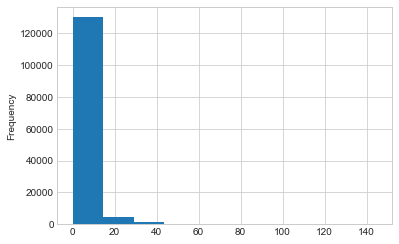

In [239]:
train.Evaporation.plot.hist()

In [240]:
df_bin.Evaporation.isnull().sum()

5939

In [241]:
# Ta bort NA värden från Evaporation
print(len(df_bin.Evaporation))
df_bin = df_bin.dropna(subset=['Evaporation'])
df_con = df_con.dropna(subset=['Evaporation'])
print(len(df_bin.Evaporation))

142193
136254


In [242]:
df_bin.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation
5939,No,2009-01-01,Cobar,17.9,35.2,0.0,12.0
5940,No,2009-01-02,Cobar,18.4,28.9,0.0,14.8
5941,No,2009-01-03,Cobar,15.5,34.1,0.0,12.6
5942,No,2009-01-04,Cobar,19.4,37.6,0.0,10.8
5943,No,2009-01-05,Cobar,21.9,38.4,0.0,11.4


In [243]:
train.Sunshine.isnull().sum()

67816

In [244]:
train.Sunshine = train['Sunshine'].interpolate(method='linear')
train.Sunshine.isnull().sum()

5939

In [245]:
df_bin['Sunshine'] = train['Sunshine']
df_con['Sunshine'] = train['Sunshine']
df_bin.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine
5939,No,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3
5940,No,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0
5941,No,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3
5942,No,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6
5943,No,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2


In [246]:
# Ta bort NA värden från Sunshine
print(len(df_bin.Sunshine))
df_bin = df_bin.dropna(subset=['Sunshine'])
df_con = df_con.dropna(subset=['Sunshine'])
print(len(df_bin.Sunshine))

136254
136254


In [247]:
df_bin.Sunshine.isnull().sum()

0

In [248]:
train.WindGustDir.isnull().sum()

9330

In [250]:
print(train.WindGustDir)

0           W
1         WNW
2         WSW
3          NE
4           W
         ... 
142188      E
142189      E
142190    NNW
142191      N
142192     SE
Name: WindGustDir, Length: 142193, dtype: object


In [251]:
train.WindGustDir.values

array(['W', 'WNW', 'WSW', ..., 'NNW', 'N', 'SE'], dtype=object)

In [283]:
# Lägger till WindGustDir till dataframe
df_bin['WindGustDir'] = train['WindGustDir']
# Droppar alla NaN-värden för att kunna koda om väderstreck(str) till int
df_bin = df_bin.dropna(subset=['WindGustDir'])
# Använder labelencoder för att transformera str -> int
lb_make = LabelEncoder()
df_bin['WindGustDirNum'] = lb_make.fit_transform(df_bin['WindGustDir'])
# Tar bort WindGustDir då den ej behövs mer
df_bin = df_bin.drop(['WindGustDir'], axis=1)
df_bin.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDirNum
5939,No,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,11
5940,No,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,8
5941,No,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,9
5942,No,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,5
5943,No,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,14


In [286]:
train.WindGustSpeed.isnull().sum()

9270

0    44.0
1    44.0
2    46.0
3    24.0
4    41.0
Name: WindGustSpeed, dtype: float64